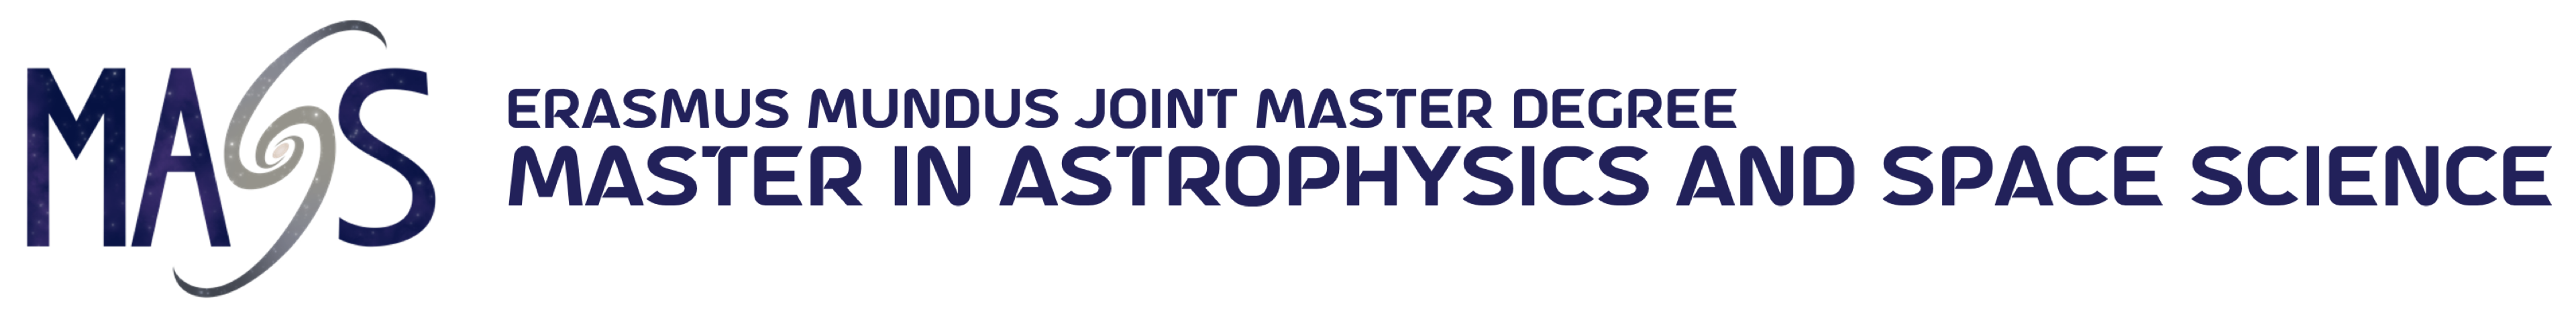
# AGNs Tutorial 6
## Photometric reverberation mapping

31 May 2024

**Student:** Francesca Borg

**Instructors:** Prof. Dragana Ilic, Natasa Pavlov

# Task 1

**Goal:**

- Understand the photometric reverberation mapping method and its limitations. 
- Introduction to the tools for simulating AGN light curves and performing photoRM.

**a)** Familiarize yourself with photRM module (read the docs located in photRM.py). Using the `lc_two_bands` function from the `photRM` module, construct **three pairs** of continuum and emission line light curves of length 5000 days. This is a hypothetical scenario where we generate pairs of light curves as if they are observed in two broadband filters:

   - one covering only continuum emission (we will name it *x-band*)
   - second covering emission line and the underlying continuum (we will name it *y-band*)

Make sure that the light curve pairs are simulated for the artificial AGN objects at z = 0.1 having luminosity (log L): 43, 44, and 45, respectively. The emission line contribution to the total integrated flux should be 25% and the continuum contribution 75% in all cases. Plot the first 1000 days of the light curves and compare the properties (printed when you run `lc_two_bands`) of these three simulated AGN objects. How would you explain the correlation between AGN luminosity and broad line region dimensions (i.e. time-lag)? Cut the light curve length to 1000 points and save them for later use.

In [1]:
# Standard libs
import os

# 3rd party libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.signal import find_peaks
from speclite import filters
import astropy.units as u

# Local libs
from add_asym import add_asym
import photRM
from pyzdcf import pyzdcf

In [2]:
x_band1, y_band1, line_response1 = photRM.lc_two_bands(T=5000, z=0.1, lum=43, wl=0.25, wc=0.75)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 43.00
MBH = 3.14e+06 M_sun
tau_DRW = 17.31 days
sigma_DRW = 0.05 mag^2/day
Time-lag = 9.86 days


In [3]:
x_band2, y_band2, line_response2 = photRM.lc_two_bands(T=5000, z=0.1, lum=44, wl=0.25, wc=0.75)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 44.00
MBH = 1.46e+07 M_sun
tau_DRW = 31.98 days
sigma_DRW = 0.03 mag^2/day
Time-lag = 33.65 days


In [4]:
x_band3, y_band3, line_response3 = photRM.lc_two_bands(T=5000, z=0.1, lum=45, wl=0.25, wc=0.75)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 45.00
MBH = 6.76e+07 M_sun
tau_DRW = 59.10 days
sigma_DRW = 0.01 mag^2/day
Time-lag = 114.82 days


The higher the AGN luminosity, the longer the time-lag, i.e. the larger the BLR radius. This could suggest that a brighter AGN is the result of a larger accretion disk containing more accreting material.

In [5]:
#look at dataframe content
x_band1

,t,flux,err
0,1,0.918951,0.004793
1,2,0.922091,0.004801
2,3,0.927383,0.004815
3,4,0.934491,0.004833
4,5,0.931725,0.004826
...,...,...,...
4995,4996,0.928237,0.004817
4996,4997,0.930287,0.004823
4997,4998,0.928196,0.004817
4998,4999,0.931818,0.004827


Text(0.5, 0, 'Time [days]')

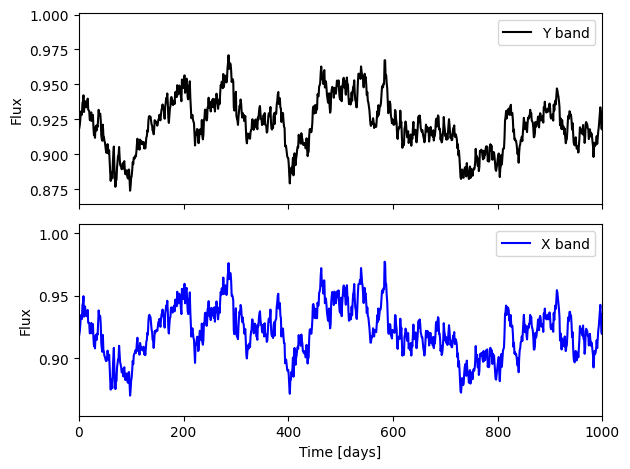

In [6]:
#plot all bands of light curve (within 1000 days)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax1.plot(y_band1['t'], y_band1['flux'], c='black', label='Y band')
ax1.legend()
ax1.set_ylabel('Flux')

ax2.plot(x_band1['t'], x_band1['flux'], c='blue', label='X band')
ax2.legend()
ax2.set_ylabel('Flux')


plt.xlim(0,1000)
plt.xlabel('Time [days]')


In [7]:
#cut to keep only the first 1000 days i.e. t<1000

x_band1=x_band1[:1000]
y_band1=y_band1[:1000]
line_response1=line_response1[:1000]

print(len(x_band1), len(y_band1), len(line_response1))

1000 1000 1000


In [8]:
#cut to keep only the first 1000 days i.e. t<1000

x_band2=x_band2[:1000]
y_band2=y_band2[:1000]
line_response2=line_response2[:1000]

print(len(x_band2), len(y_band2), len(line_response2))

1000 1000 1000


In [9]:
#cut to keep only the first 1000 days i.e. t<1000

x_band3=x_band3[:1000]
y_band3=y_band3[:1000]
line_response3=line_response3[:1000]

print(len(x_band3), len(y_band3), len(line_response3))

1000 1000 1000


Text(0.5, 0, 'Time [days]')

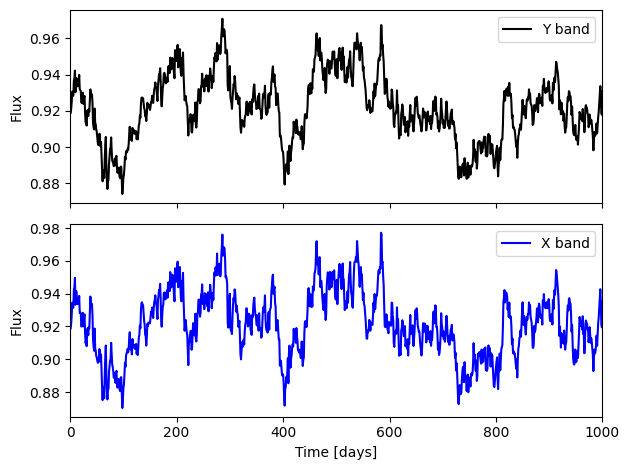

In [10]:
#plot all bands of light curve (within 1000 days)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax1.plot(y_band1['t'], y_band1['flux'], c='black', label='Y band')
ax1.legend()
ax1.set_ylabel('Flux')

ax2.plot(x_band1['t'], x_band1['flux'], c='blue', label='X band')
ax2.legend()
ax2.set_ylabel('Flux')


plt.xlim(0,1000)
plt.xlabel('Time [days]')


Text(0.5, 0, 'Time [days]')

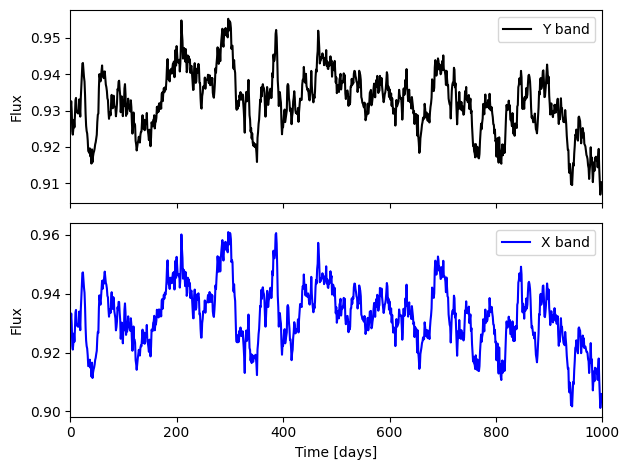

In [11]:
#plot all bands of light curve (within 1000 days)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax1.plot(y_band2['t'], y_band2['flux'], c='black', label='Y band')
ax1.legend()
ax1.set_ylabel('Flux')

ax2.plot(x_band2['t'], x_band2['flux'], c='blue', label='X band')
ax2.legend()
ax2.set_ylabel('Flux')


plt.xlim(0,1000)
plt.xlabel('Time [days]')


Text(0.5, 0, 'Time [days]')

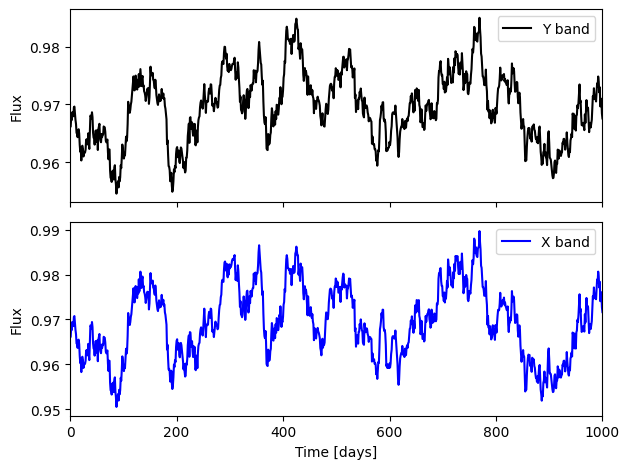

In [12]:
#plot all bands of light curve (within 1000 days)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax1.plot(y_band3['t'], y_band3['flux'], c='black', label='Y band')
ax1.legend()
ax1.set_ylabel('Flux')

ax2.plot(x_band3['t'], x_band3['flux'], c='blue', label='X band')
ax2.legend()
ax2.set_ylabel('Flux')


plt.xlim(0,1000)
plt.xlabel('Time [days]')


In [13]:
print(x_band1.isnull().any().any())
print(x_band2.isnull().any().any())
print(x_band3.isnull().any().any())

print(y_band1.isnull().any().any())
print(y_band2.isnull().any().any())
print(y_band3.isnull().any().any())

False
False
False
False
False
False


In [14]:
#save them for later use

np.savetxt('x_band1.txt',x_band1,fmt=['%.1f','%.7e','%.7e'])
np.savetxt('x_band2.txt',x_band2,fmt=['%.1f','%.7e','%.7e'])
np.savetxt('x_band3.txt',x_band3,fmt=['%.1f','%.7e','%.7e'])

np.savetxt('y_band1.txt',y_band1,fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band2.txt',y_band2,fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band3.txt',y_band3,fmt=['%.1f','%.7e','%.7e'])

np.savetxt('line_response1.txt',line_response1,fmt=['%.1f','%.7e','%.7e'])
np.savetxt('line_response2.txt',line_response2,fmt=['%.1f','%.7e','%.7e'])
np.savetxt('line_response3.txt',line_response3,fmt=['%.1f','%.7e','%.7e'])


**b)** Using the photometric reverberation mapping method and the `pyzdcf` module, estimate the time-lag (broad line region radius) for these three light curve pairs. You can use the default values for keyword arguments in the function. How do the time-lag estimates compare to the values reported by `lc_two_bands`? You can estimate the time-lag using the `photRM.peak_finder` or (optionally) you can compile a Fortran code [PLIKE](https://www.weizmann.ac.il/particle/tal/research-activities/software) to obtain more accurate results and errors. Similarly display the results as in Astro Data Lab notebook.

>To install pyzdcf:
>
>   `pip install pyzdcf`
>    
>or you can run this notebook in Astro Data Lab where `pyzdcf` is already installed.

> To run PLIKE:
>
> - download the source code [here](https://webhome.weizmann.ac.il/home/tal/zdcf/plike_v4.0.f90)
> - if you don't have a fortran compiler, I suggest you install `gfortran` on your system
> - navigate to the folder containing the downloaded file
> - from there, run the following commands in the terminal:  
> `gfortran -o plike source_code_filename`  
> `./plike`

In [15]:
#find acf (light curve with itself)

params = dict(autocf            =  True, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band1.txt'  # Name of the light curve file
             )

acf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.



In [16]:
#find ccf

params = dict(autocf            =  False, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band1.txt',   # Name of the first light curve file
              lc2_name          =  'y_band1.txt'    # Name of the second light curve file (required only if we do CCF)
             )

ccf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

992 bins actually used, 500032 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.



In [17]:
ccf

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,-991.0,4.0,0.0,0.047105,0.386676,0.378750,9.0
1,-989.0,1.0,0.0,0.487493,0.279475,0.233772,11.0
2,-987.0,1.0,0.0,0.582254,0.219435,0.181860,13.0
3,-985.0,1.0,0.0,0.620410,0.186998,0.155963,15.0
4,-983.0,1.0,0.0,0.515913,0.204091,0.177255,17.0
...,...,...,...,...,...,...,...
987,983.0,0.0,1.0,0.312804,0.245092,0.224744,17.0
988,985.0,0.0,1.0,0.534495,0.215180,0.183754,15.0
989,987.0,0.0,1.0,0.570366,0.223681,0.186038,13.0
990,989.0,0.0,1.0,0.543050,0.260414,0.213756,11.0


In [18]:
# ccf and acf are of different lengths
print(len(ccf), len(acf))

#we need to interpolate to make the two datasets comparable

#using interp():
    # a: df with common grid of tau values
    # b: df which we want to force upon that grid

#using delta_ccf(acf, ccf)
    # Subtract ACF from CCF and use error propagation (Laursen et al. 2019) to estimate asymmetric errors in the resulting function.

acf_final = photRM.interp(ccf,acf)
ccf_final = photRM.delta_ccf(acf_final, ccf)


992 990


In [19]:
help(photRM.peak_finder)

Help on function peak_finder in module photRM:

peak_finder(y, x, interval, first=False)
    Find highest positive peak in a user defined interval. Useful for finding coresponding time-lag in CCF. By setting first=True, you can also specify that you want to select first peak found in a given interval, instead of the highest one.



In [20]:
ccf_final

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,-991.0,3,0,-1775.029284,0.382772,0.382772,999
1,-989.0,0,0,-1767.545927,0.257070,0.257070,999
2,-987.0,0,0,-1760.403948,0.201066,0.201066,999
3,-985.0,0,0,-1753.333273,0.171851,0.171851,999
4,-983.0,0,0,-1746.420249,0.190949,0.190949,999
...,...,...,...,...,...,...,...
987,983.0,0,0,-0.101930,0.331188,0.309035,17
988,985.0,0,0,-0.098362,0.278831,0.247601,15
989,987.0,0,0,-0.066680,0.295502,0.258205,13
990,989.0,0,0,0.005991,0.365159,0.318699,11


In [21]:
#estimating the time lag using peak_finder

tau, peaks_x, peaks_y = photRM.peak_finder(ccf_final.dcf.values,ccf_final.tau.values,(0,100))

Peak candidates (x-axis vals):  [ 9. 47. 87.]
Max. peak:  9.0


The value reported by `lc_two_bands` was Time-lag = 9.86 days, which means that we have obtained quite a close estimate.

In [22]:
#find acf (light curve with itself)

params = dict(autocf            =  True, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band2.txt'  # Name of the light curve file
             )

acf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

#find ccf

params = dict(autocf            =  False, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band2.txt',   # Name of the first light curve file
              lc2_name          =  'y_band2.txt'    # Name of the second light curve file (required only if we do CCF)
             )

ccf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

# ccf and acf are of different lengths
print(len(ccf), len(acf))

#we need to interpolate to make the two datasets comparable

#using interp():
    # a: df with common grid of tau values
    # b: df which we want to force upon that grid

#using delta_ccf(acf, ccf)
    # Subtract ACF from CCF and use error propagation (Laursen et al. 2019) to estimate asymmetric errors in the resulting function.

acf_final = photRM.interp(ccf,acf)
ccf_final = photRM.delta_ccf(acf_final, ccf)

tau, peaks_x, peaks_y = photRM.peak_finder(ccf_final.dcf.values,ccf_final.tau.values,(0,100))


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

992 bins actually used, 500032 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.

992 990
Peak candidates (x-axis vals):  [33. 87.]
Max. peak:  33.0


The value reported by `lc_two_bands` was Time-lag = 33.65 days, which means that we have obtained quite a close estimate.

In [23]:
print(acf_final.isnull().any().any())
print(ccf_final.isnull().any().any())

False
False


In [24]:
#find acf (light curve with itself)

params = dict(autocf            =  True, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band3.txt'  # Name of the light curve file
             )

acf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

#find ccf

params = dict(autocf            =  False, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band3.txt',   # Name of the first light curve file
              lc2_name          =  'y_band3.txt'    # Name of the second light curve file (required only if we do CCF)
             )

ccf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

# ccf and acf are of different lengths
print(len(ccf), len(acf))

#we need to interpolate to make the two datasets comparable

#using interp():
    # a: df with common grid of tau values
    # b: df which we want to force upon that grid

#using delta_ccf(acf, ccf)
    # Subtract ACF from CCF and use error propagation (Laursen et al. 2019) to estimate asymmetric errors in the resulting function.

acf_final = photRM.interp(ccf,acf)
ccf_final = photRM.delta_ccf(acf_final, ccf)

tau, peaks_x, peaks_y = photRM.peak_finder(ccf_final.dcf.values,ccf_final.tau.values,(0,100))


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

992 bins actually used, 500032 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.

992 990


ValueError: attempt to get argmax of an empty sequence

Error encountered because light curve might have no peak and time-lag cannot be calculated.

**c) (optional)** Now, to reflect a real-world scenario, let's make one of these three pairs of simulated light curves gappier (e.g., the one with log(L) = 44). Alter the light curves so they have the following cadences:

- one observation every 5 days
- one months of observations every day, then one month pause. Repeat the pattern.
- three month of observations every day, followed by six months of observations with a frequency of once per month and then a gap of three months. Repeat the pattern.

Estimate the time-lag from these three pairs of light curves. Write your conclusions regarding the accuracy of time-lag retrieval for different observing strategies you implemented. The light curves should not be longer than 1000 days.

In [25]:
#using band 2 with luminosity=44

#every 5-days observation
x_cad1 = x_band2[::5]
y_cad1 = y_band2[::5]

x_cad1

,t,flux,err
0,1,0.930337,0.004823
5,6,0.923208,0.004804
10,11,0.934502,0.004833
15,16,0.929976,0.004822
20,21,0.938723,0.004844
...,...,...,...
975,976,0.916060,0.004786
980,981,0.912931,0.004777
985,986,0.914874,0.004782
990,991,0.910740,0.004772


Text(0.5, 0, 'Time [days]')

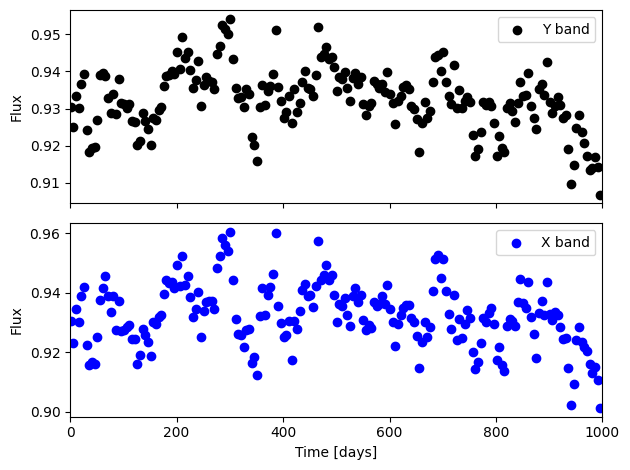

In [26]:
#plot all bands of light curve (within 1000 days)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax1.scatter(y_cad1['t'], y_cad1['flux'], c='black', label='Y band')
ax1.legend()
ax1.set_ylabel('Flux')

ax2.scatter(x_cad1['t'], x_cad1['flux'], c='blue', label='X band')
ax2.legend()
ax2.set_ylabel('Flux')


plt.xlim(0,1000)
plt.xlabel('Time [days]')


In [27]:
#save them for later use

np.savetxt('x_cad1.txt',x_cad1,fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_cad1.txt',y_cad1,fmt=['%.1f','%.7e','%.7e'])

In [28]:
#calculate the time-lag

#find acf (light curve with itself)

params = dict(autocf            =  True, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_cad1.txt'  # Name of the light curve file
             )

acf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

#find ccf

params = dict(autocf            =  False, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_cad1.txt',   # Name of the first light curve file
              lc2_name          =  'y_cad1.txt'    # Name of the second light curve file (required only if we do CCF)
             )

ccf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

# ccf and acf are of different lengths
print(len(ccf), len(acf))

#we need to interpolate to make the two datasets comparable

#using interp():
    # a: df with common grid of tau values
    # b: df which we want to force upon that grid

#using delta_ccf(acf, ccf)
    # Subtract ACF from CCF and use error propagation (Laursen et al. 2019) to estimate asymmetric errors in the resulting function.

acf_final = photRM.interp(ccf,acf)
ccf_final = photRM.delta_ccf(acf_final, ccf)

tau, peaks_x, peaks_y = photRM.peak_finder(ccf_final.dcf.values,ccf_final.tau.values,(0,100))


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

190 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

380 bins actually used, 290 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.

380 190
Peak candidates (x-axis vals):  [35. 85.]
Max. peak:  35.0


The value reported by `lc_two_bands` was Time-lag = 33.65 days, which means that we still get quite a close estimate with this cadence of observations..

# Task 2

**Goal:** Apply photometric reverberation mapping to real-world data.

Download photometric light curves of NGC 4395 from Edri et al. (2012). Choose one filter which covers the continuum emission only and the other one that covers the H$\alpha$ emission line and the underlying continuum. Using the utility functions provided, process the data so that time is expressed in hours and line intensity and its error are expressed as normalized flux. Plot the light curves. You will see that they are divided into segments because we have a pause in observations during the daylight. Choose the first segment and estimate the time lag using this data. Compare your results to Edri et al. (2012) and discuss the pros and cons of photometric reverberation mapping compared to spectroscopic reverberation mapping.

In [29]:
# Read the light curves using pd.read_csv()

#R band = H-alpha emission + continumm
r = pd.read_csv('./obs_data/lc_r.txt', header=0, sep=" ", skipinitialspace=True, usecols=[0,1,2])
#I band = continuum
i = pd.read_csv('./obs_data/lc_i.txt', header=0, sep=" ", skipinitialspace=True, usecols=[0,1,2])

In [30]:
r

,MJD,mag,mag_err
0,2.455616e+06,16.272,0.027
1,2.455616e+06,16.270,0.026
2,2.455616e+06,16.263,0.022
3,2.455616e+06,16.260,0.021
4,2.455616e+06,16.251,0.021
...,...,...,...
277,2.455627e+06,16.305,0.021
278,2.455627e+06,16.319,0.023
279,2.455627e+06,16.301,0.023
280,2.455627e+06,16.305,0.023


In [31]:
# Light curve processing utility function

from lc_proc import lc_proc
help(lc_proc)

Help on function lc_proc in module lc_proc:

lc_proc(lcs, filters, time='hours')
    Process a list of light curves from Edri et al. (2012). Each light curve 
    is stored as a pandas dataframe.
    
    Parameters:
    -----------
    lcs: list (elements assumed to be pd.DataFrame objects)
        A list of light curves. Each light curve is a pd.DataFrame with columns:
        MJD, mag, mag_err
    filters: str
        Corresponding filter names for light curves (possible vals: 'r', 'g', 'i')
    time: str
        Time unit to convert into. Default is 'hours'.
        
    Returns:
    --------
    lcs: list
        A list of input light curves with added columns: time_hours, flux, 
        flux_err, norm_flux, norm_flux_err



In [32]:
lcs = [r, i]
filters = ['r', 'i'] # see lc_proc docs for accepted values for filters
new_lcs = lc_proc(lcs, filters)

In [33]:
new_lcs[0]

,MJD,mag,mag_err,time_hours,flux,flux_err,norm_flux,norm_flux_err
0,2.455616e+06,16.272,0.027,0.00000,2577.507870,69.592712,0.367951,0.139859
1,2.455616e+06,16.270,0.026,0.46464,2582.260191,67.138765,0.377501,0.134927
2,2.455616e+06,16.263,0.022,0.69696,2598.962421,57.177173,0.411067,0.114907
3,2.455616e+06,16.260,0.021,0.92928,2606.153550,54.729225,0.425519,0.109988
4,2.455616e+06,16.251,0.021,1.16160,2627.846541,55.184777,0.469115,0.110903
...,...,...,...,...,...,...,...,...
277,2.455627e+06,16.305,0.021,246.94248,2500.345362,52.507253,0.212879,0.105522
278,2.455627e+06,16.319,0.023,247.17528,2468.311690,56.771169,0.148502,0.114092
279,2.455627e+06,16.301,0.023,247.40808,2509.573964,57.720201,0.231426,0.115999
280,2.455627e+06,16.305,0.023,247.64064,2500.345362,57.507943,0.212879,0.115572


/tmp/ipykernel_1424939/2061079124.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(new_lcs[0]['time_hours'],new_lcs[0]['norm_flux'],yerr=new_lcs[0]['norm_flux_err'],fmt='ko', c='black', capsize=2, linewidth=0.5, label='Y band', ms=2)
/tmp/ipykernel_1424939/2061079124.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax2.errorbar(new_lcs[1]['time_hours'],new_lcs[1]['norm_flux'],yerr=new_lcs[1]['norm_flux_err'], c='blue', label='X band', ms=2, fmt='ko', capsize=2, linewidth=0.5)


Text(0.5, 0, 'Time [hours]')

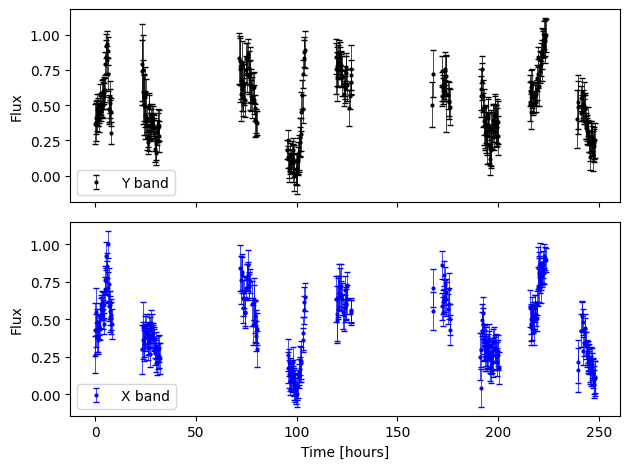

In [34]:
#plot the light curves

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax1.errorbar(new_lcs[0]['time_hours'],new_lcs[0]['norm_flux'],yerr=new_lcs[0]['norm_flux_err'],fmt='ko', c='black', capsize=2, linewidth=0.5, label='Y band', ms=2)
ax1.legend()
ax1.set_ylabel('Flux')

ax2.errorbar(new_lcs[1]['time_hours'],new_lcs[1]['norm_flux'],yerr=new_lcs[1]['norm_flux_err'], c='blue', label='X band', ms=2, fmt='ko', capsize=2, linewidth=0.5)
ax2.legend()
ax2.set_ylabel('Flux')

plt.xlabel('Time [hours]')

/tmp/ipykernel_1424939/3065863869.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(new_lcs[0]['time_hours'],new_lcs[0]['norm_flux'],yerr=new_lcs[0]['norm_flux_err'],fmt='ko', c='black', capsize=2, linewidth=0.5, label='Y band', ms=2)
/tmp/ipykernel_1424939/3065863869.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax2.errorbar(new_lcs[1]['time_hours'],new_lcs[1]['norm_flux'],yerr=new_lcs[1]['norm_flux_err'], c='blue', label='X band', ms=2, fmt='ko', capsize=2, linewidth=0.5)


(0.0, 10.0)

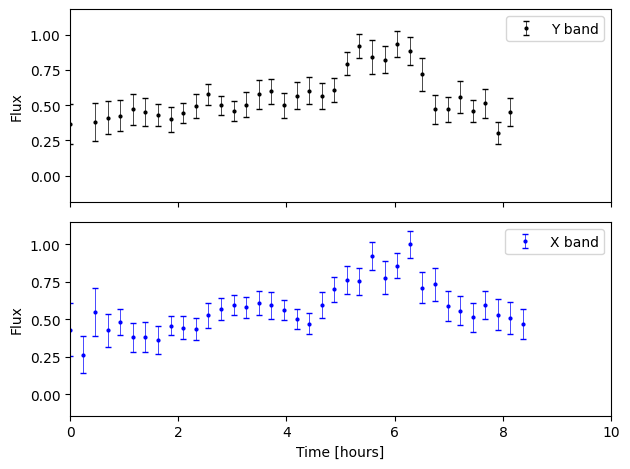

In [35]:
#choosing the first segment

#plot the light curves

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True)

ax1.errorbar(new_lcs[0]['time_hours'],new_lcs[0]['norm_flux'],yerr=new_lcs[0]['norm_flux_err'],fmt='ko', c='black', capsize=2, linewidth=0.5, label='Y band', ms=2)
ax1.legend()
ax1.set_ylabel('Flux')

ax2.errorbar(new_lcs[1]['time_hours'],new_lcs[1]['norm_flux'],yerr=new_lcs[1]['norm_flux_err'], c='blue', label='X band', ms=2, fmt='ko', capsize=2, linewidth=0.5)
ax2.legend()
ax2.set_ylabel('Flux')

plt.xlabel('Time [hours]')
plt.xlim(0,10)

It can be seen from the light curve that the first segment spans slightly beyond 8 hrs.

In [36]:
#check time in hours
new_lcs[0]['time_hours'][0:40]

0      0.00000
1      0.46464
2      0.69696
3      0.92928
4      1.16160
5      1.39392
6      1.62648
7      1.85880
8      2.09184
9      2.32440
10     2.55720
11     2.78976
12     3.02208
13     3.25464
14     3.48720
15     3.72096
16     3.95352
17     4.18632
18     4.41864
19     4.65072
20     4.88328
21     5.11560
22     5.34816
23     5.58072
24     5.81304
25     6.04584
26     6.27864
27     6.51096
28     6.74352
29     6.97584
30     7.20864
31     7.44072
32     7.67304
33     7.90536
34     8.13744
35    23.30832
36    23.54064
37    23.77296
38    24.00576
39    24.23832
Name: time_hours, dtype: float64

In [37]:
new_lcs[1]['time_hours'][0:40]

0      0.00000
1      0.23304
2      0.46536
3      0.69744
4      0.93000
5      1.16232
6      1.39440
7      1.62696
8      1.85952
9      2.09184
10     2.32536
11     2.55744
12     2.79024
13     3.02280
14     3.25488
15     3.48768
16     3.72096
17     3.95424
18     4.18680
19     4.41936
20     4.65144
21     4.88400
22     5.11632
23     5.34840
24     5.58120
25     5.81352
26     6.04608
27     6.27912
28     6.51168
29     6.74400
30     6.97656
31     7.20912
32     7.44144
33     7.67376
34     7.90608
35     8.13840
36     8.37048
37    23.54136
38    23.77344
39    24.00600
Name: time_hours, dtype: float64

The first segment lasts until 8.13744 hours, which is located at position `[34]` in the df.

In [38]:
#first_segment=[new_lcs[0][:34], new_lcs[1][:34]]
first_segment = [new_lcs[0].head(35), new_lcs[1].head(35)]
first_segment[1]

,MJD,mag,mag_err,time_hours,flux,flux_err,norm_flux,norm_flux_err
0,2.455616e+06,16.878,0.048,0.00000,983.558056,47.210787,0.430746,0.176837
1,2.455616e+06,16.928,0.035,0.23304,939.290652,32.875173,0.264934,0.123140
2,2.455616e+06,16.844,0.042,0.46536,1014.845663,42.623518,0.547940,0.159655
3,2.455616e+06,16.879,0.030,0.69744,982.652583,29.479577,0.427355,0.110421
4,2.455616e+06,16.863,0.024,0.93000,997.240712,23.933777,0.481997,0.089649
5,2.455616e+06,16.893,0.027,1.16232,970.063134,26.191705,0.380198,0.098106
6,2.455616e+06,16.892,0.028,1.39440,970.957007,27.186796,0.383546,0.101833
7,2.455616e+06,16.898,0.026,1.62696,965.606099,25.105759,0.363504,0.094038
8,2.455616e+06,16.870,0.017,1.85952,990.831945,16.844143,0.457992,0.063093
9,2.455616e+06,16.874,0.021,2.09184,987.188301,20.730954,0.444344,0.077652


In [39]:
#save first segment as txt
np.savetxt('y_band4.txt',first_segment[0])
np.savetxt('x_band4.txt',first_segment[1])

In [40]:
#estimate the time-lag

#find acf (light curve with itself)

params = dict(autocf            =  True, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band4.txt'  # Name of the light curve file
             )

acf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

#find ccf

params = dict(autocf            =  False, # Autocorrelation (T) or cross-correlation (F)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  'x_band4.txt',   # Name of the first light curve file
              lc2_name          =  'y_band4.txt'    # Name of the second light curve file (required only if we do CCF)
             )

ccf = pyzdcf(input_dir  = './',
                output_dir = './', 
                intr=False,
                parameters = params, 
                sep        = ' ',
                sparse     = 'auto', 
                verbose    = True)

acf_final = photRM.interp(ccf,acf)
ccf_final = photRM.delta_ccf(acf_final, ccf)

tau, peaks_x, peaks_y = photRM.peak_finder(ccf_final.dcf.values,ccf_final.tau.values,(0,100))


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

23 bins actually used, 329.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

43 bins actually used, 684 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.

Peak candidates (x-axis vals):  [17.85817973]
Max. peak:  17.858179728190105


The max peak/time-lag using only the first segment of observation was found to be ~18 hours. Results from Edri et al (2012) gave a time-lag of 3.6 ($\pm$ 0.8) hrs. This is not a very close estimate, however better results might have been given if the light curve used to compute this value contained longer times of observation. In this case, we only had 34 data points to work with.

Spectroscopic reverberation mapping is advantageous because it is more accurate than photometric reverberation mapping. This is especially important for AGNs because they emit in concentrated wavelength ranges narrower than the typical photometric band filters.

Photometric reverberation mapping is useful for distant sources which cannot be observed at high enough resolution to perform spectroscopy, or have not yet been observed spectroscopically, since this is a more resource-expensive method of observation.

# References:

- Edri et al. (2012) https://ui.adsabs.harvard.edu/abs/2012ApJ...756...73E/abstract
- Jankov et al. (2022) https://ui.adsabs.harvard.edu/abs/2022AN....34310090J/abstract
- Kovacevic et al. (2021) https://ui.adsabs.harvard.edu/abs/2021MNRAS.505.5012K/abstract
- [Astro Data Lab](https://datalab.noirlab.edu/)
- [pyzdcf documentation](https://pyzdcf.readthedocs.io/en/latest/?badge=latest)
- [PLIKE download link](https://www.weizmann.ac.il/particle/tal/research-activities/software)
- [pyZDCF: Initial Release](https://zenodo.org/records/7253034#:~:text=pyZDCF%20is%20a%20Python%20module,unevenly%20sampled%20astronomical%20time%2Dseries.)